In [130]:
#Import Modules

In [131]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [132]:
drugdata = pd.read_csv('c1data.csv')

In [133]:
drugdata.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [134]:
coldrop= ['Age']
drugdata2= drugdata.drop(coldrop, axis= 1)

In [135]:
drugdata2.head()

,Sex,BP,Cholesterol,Na_to_K,Drug
0,F,HIGH,HIGH,25.355,drugY
1,M,LOW,HIGH,13.093,drugC
2,M,LOW,HIGH,10.114,drugC
3,F,NORMAL,HIGH,7.798,drugX
4,F,LOW,HIGH,18.043,drugY


In [136]:
drugdata3= pd.get_dummies(drugdata2, columns= ['Sex', 'BP', 'Cholesterol', 'Drug'])
drugdata3.head()

,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,25.355,1,0,1,0,0,1,0,0,0,0,0,1
1,13.093,0,1,0,1,0,1,0,0,0,1,0,0
2,10.114,0,1,0,1,0,1,0,0,0,1,0,0
3,7.798,1,0,0,0,1,1,0,0,0,0,1,0
4,18.043,1,0,0,1,0,1,0,0,0,0,0,1


In [137]:
X = drugdata3[['Na_to_K']]
y = drugdata3[['Drug_drugY']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)  

In [138]:
 lreg= LogisticRegression()
lreg.fit(X_train,y_train.values.ravel())
y_pred = lreg.predict(X_test)

In [139]:
metrics2 = metrics.confusion_matrix(y_test, y_pred)
print(metrics2)

[[30  0]
 [ 0 30]]


In [140]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [141]:
y_pred_proba = lreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
Acc = metrics.roc_auc_score(y_test, y_pred_proba)

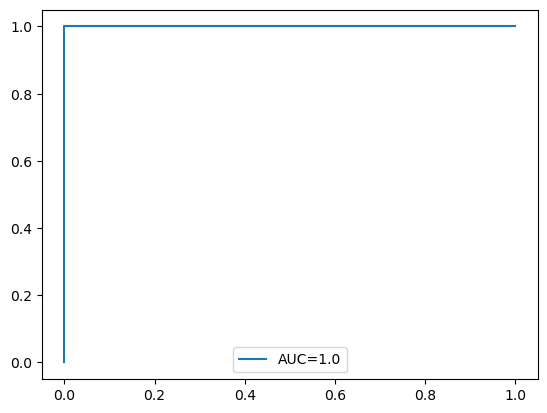

In [142]:
plt.plot(fpr,tpr,label="AUC="+str(Acc))
plt.legend(loc=8)
plt.show()

In [143]:
drugdata4= drugdata3[['Na_to_K', 'Drug_drugY']]
drugdata4.columns= ['Na_to_K', 'Drug_drugY'] 
drugdata4.head()

,Na_to_K,Drug_drugY
0,25.355,1
1,13.093,0
2,10.114,0
3,7.798,0
4,18.043,1


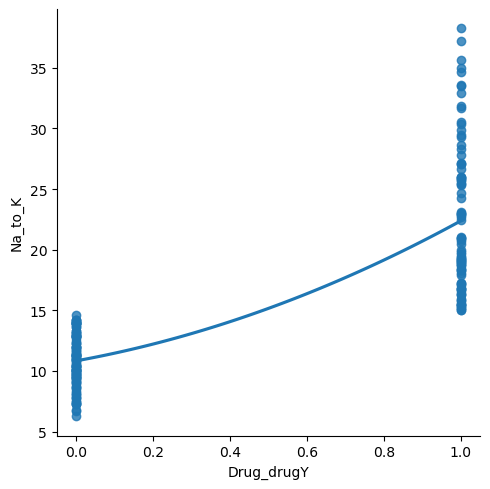

In [144]:
sns.lmplot(x="Drug_drugY", y= "Na_to_K", data= drugdata4, order= 2, ci= None )
plt.show()

In [145]:
X= np.array(drugdata4['Drug_drugY']).reshape(-1, 1)
y= np.array(drugdata4['Na_to_K']).reshape(-1, 1)
drugdata4.dropna(inplace= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
lreg= LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_test, y_test))

0.5604664883798844


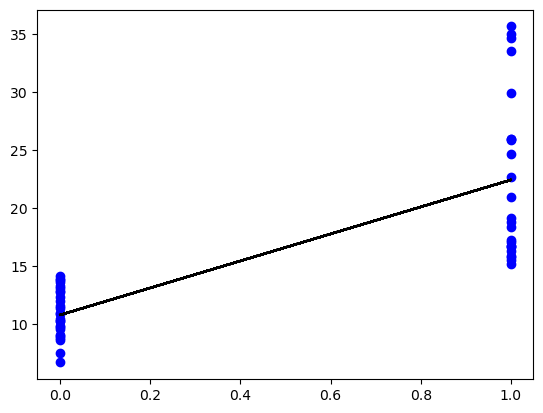

In [146]:
y_pred= lreg.predict(X_test)
plt.scatter(X_test, y_test, color= 'b')
plt.plot(X_test, y_pred, color= 'k')
plt.show()

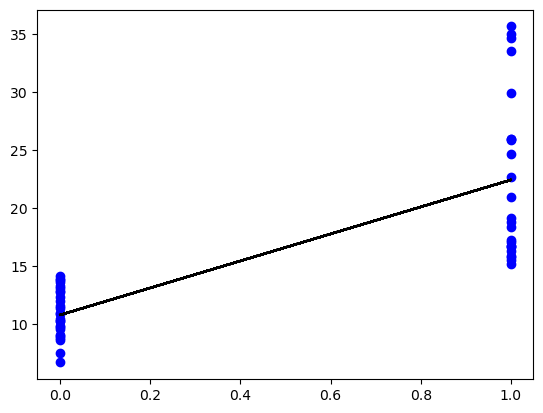

In [147]:
ypred= lreg.predict(X_test)
plt.scatter(X_test, y_test, color= 'b')
plt.plot(X_test, y_pred, color= 'k')

In [148]:
ABS = mean_absolute_error(y_true=y_test,y_pred=y_pred)
sq = mean_squared_error(y_true=y_test,y_pred=y_pred)
sq2 = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print(ABS)
print(sq)
print(sq2)

3.7721231936702027
24.72983486630384
4.972910100364156


In [149]:
#Model is accurate